# Introduction to Computational Science
# Assignment 2

## Gillespie Algorithm

1. Generate two random numbers between 0 and 1
2. Estimate time until next event based on cumulative rates of all possible events.
3. Convert event rates into probabilities by randomly selecting one of these events.
4. Repeat this process to iterate the model through time.


### Events:
1. Birth X→X+1
2. Transmission Y→Y+ 1 and X→X−1
3. Recovery Y→Y−1 and Z→Z+1
4. Death, three independent events, X→X − 1, Y → Y− 1, Z→Z−1

91 9 1
92 9 1
93 9 1
94 9 1
93 10 1
94 10 1
95 10 1
96 10 1
97 10 1
96 11 1
97 11 1
98 11 1
97 12 1
96 13 1
95 14 1
94 15 1
95 15 1
96 15 1
97 15 1
98 15 1
99 15 1
98 16 1
97 17 1
96 18 1
95 19 1
94 20 1
93 21 1
92 22 1
92 21 2
91 22 2
91 21 3
91 20 4
90 21 4
89 22 4
89 21 5
88 22 5
88 21 6
87 22 6
86 23 6
85 24 6
84 25 6
83 26 6
82 27 6
81 28 6
80 29 6
80 28 7
80 27 8
80 26 9
79 27 9
78 28 9
77 29 9
76 30 9
75 31 9
74 32 9
73 33 9
73 32 10
72 33 10
71 34 10
70 35 10
69 36 10
69 35 11
68 36 11
67 37 11
67 36 12
66 37 12
66 36 13
65 37 13
65 36 14
64 37 14
63 38 14
62 39 14
61 40 14
61 39 15
61 38 16
60 39 16
60 38 17
60 37 18
60 36 19
60 35 20
59 36 20
58 37 20
58 36 21
57 37 21
57 36 22
57 35 23
57 34 24
57 33 25
56 34 25
56 33 26
56 32 27
56 31 28
55 32 28
55 31 29
54 32 29
54 31 30
53 32 30
53 31 31
52 32 31
52 31 32
51 32 32
50 33 32
50 32 33
50 31 34
50 30 35
50 29 36
49 30 36
48 31 36
48 30 37
48 29 38
47 30 38
47 29 39
46 30 39
46 29 40
46 28 41
46 27 42
46 26 43
46 25 44
45 26 

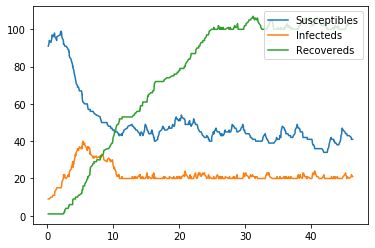

In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# Initialize variables
beta = 1/3
gamma = 0.1
mu = 0.02
N = 100
X = 90
Y = 9
Z = 1
T = 0

# Label events
E1, E2, E3, E4, E5, E6 = [1,2,3,4,5,6]

# Get random numbers
for i in range(6):
    r = np.random.rand()

def get_rates(X, Y, Z):
    """
    Determine at which rate an event occurs
    """
    rate_E1 = mu * N
    rate_E2 = beta * X * Y / N
    rate_E3 = gamma * Y
    rate_E4 = mu * X
    rate_E5 = mu * Y 
    rate_E6 = mu * Z
    
    events = [rate_E1, rate_E2, rate_E3, rate_E4, rate_E5, rate_E6]
        
    return events
    


def gillespie(X, Y, Z, T):
    """
    Choose the next time and event
    """

    # Generate two random numbers between 0 and 1.
    random_time = np.random.rand()
    
    events = get_rates(X, Y, Z)
    
    Rtotal = sum(events)

    # Get reaction time
    tau = (1.0/Rtotal) * np.log((1.0/random_time))
    T += tau
    
    # Determine which event occurs 
    # Make list of reaction intervals
    rates = []
    for i in events:
        rates.append(i/Rtotal)
    
    random_event = random.uniform(0, max(rates))
    interval = sorted(rates)
    
    # Check in which interval the random number falls
    for j in range(1, len(rates)):
        if random_event > interval[j-1] and random_event <= interval[j]:
            found = interval[j]
        else:
            
            # Random event < than interval[j-i]
            found = interval[j-1]
    
    # Retrieve which event is related to this interval
    for k in range(len(rates)):
        if rates[k] == found:
            index = k
            break

    # Execute the randomly chosen event
    # Birth
    if index == 0:
        X += 1

    # Transmission
    elif index == 1:
        Y += 1
        X -= 1

    # Recovery
    elif index == 2:
        Z += 1
        Y -= 1

    # Death 
    elif index == 3:
        X -= 1
    elif index == 4:
        Y -= 1
    else:
        Z -= 1
        
    return X, Y, Z, T


    
plots = []
time = []
Xs = []
for i in range(500):
    X, Y, Z, T = gillespie(X, Y, Z, T)
    plots.append([X, Y, Z])
    print(X, Y, Z)
    time.append(T)
    Xs.append(X)

# plt.plot(time, Xs)
plt.plot(time, plots)
plt.legend(['Susceptibles','Infecteds','Recovereds'], loc="upper right")
plt.show()

